# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS-109A Introduction to Data Science



## Group #20: Final Project - World Cup Predictions 

**Harvard University**<br>
**Fall 2018**<br>
**Group Members:** <br>

In [47]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set()
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML

In [48]:
X = pd.read_csv('data/team/project_data_v2.csv', index_col='Unnamed: 0')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1787 entries, 0 to 1786
Data columns (total 31 columns):
date             1787 non-null object
home_team        1787 non-null object
away_team        1787 non-null object
home_score       1787 non-null int64
away_score       1787 non-null int64
tournament       1787 non-null object
city             1787 non-null object
country          1787 non-null object
neutral          1787 non-null int64
home_rank        1787 non-null int64
home_rank_pts    1787 non-null int64
away_rank        1787 non-null int64
away_rank_pts    1787 non-null int64
rank_diff        1787 non-null int64
rank_pts_diff    1787 non-null int64
outcome          1787 non-null object
outcome_num      1787 non-null int64
home_game        1787 non-null int64
away_game        1787 non-null int64
home_OVR         1787 non-null int64
home_ATT         1787 non-null int64
home_MID         1787 non-null int64
home_DEF         1787 non-null int64
home_team_id     1787 non-null int6

In [49]:
X['date'] = pd.to_datetime(X['date'])
X = X.drop(['home_team_id', 'home_team_url', 'away_team_id', 'away_team_url'], axis=1)
X['home-att-away-def'] = X['home_ATT'] - X['away_DEF']
X['home-def-away-att'] = X['home_DEF'] - X['away_ATT']
X['MID_diff'] = X['home_MID'] - X['away_MID']
X['Friendly'] = [1 if x == 'Friendly' else 0 for x in X['tournament']]
X.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,home_rank_pts,away_rank,away_rank_pts,rank_diff,rank_pts_diff,outcome,outcome_num,home_game,away_game,home_OVR,home_ATT,home_MID,home_DEF,away_OVR,away_ATT,away_MID,away_DEF,home-att-away-def,home-def-away-att,MID_diff,Friendly
0,2010-05-26,Hungary,Italy,6,1,Friendly,Budapest,Hungary,0,57,565,5,1184,52,-619,W,0,1,0,72,72,75,67,82,79,81,79,-7,-12,-6,1
1,2010-05-27,Argentina,Chile,3,1,Friendly,Buenos Aires,Argentina,0,7,1076,18,888,-11,188,W,0,1,0,83,85,81,80,77,82,79,71,14,-2,2,1
2,2010-05-29,Chile,Uruguay,0,3,Friendly,Buenos Aires,Argentina,1,18,888,16,899,2,-11,L,2,0,0,77,82,79,71,78,83,74,79,3,-12,5,1
3,2010-06-05,Argentina,Chile,5,1,Friendly,Buenos Aires,Argentina,0,7,1076,18,888,-11,188,W,0,1,0,83,85,81,80,77,82,79,71,14,-2,2,1
4,2010-06-12,Argentina,Uruguay,4,1,Friendly,Buenos Aires,Argentina,0,7,1076,16,899,-9,177,W,0,1,0,83,85,81,80,78,83,74,79,6,-3,7,1


In [50]:
train_data = X[X['date'] <= '2018-06-13']
test_data = X[X['date'] > '2018-06-13']

In [51]:
train_data.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,home_rank_pts,away_rank,away_rank_pts,rank_diff,rank_pts_diff,outcome,outcome_num,home_game,away_game,home_OVR,home_ATT,home_MID,home_DEF,away_OVR,away_ATT,away_MID,away_DEF,home-att-away-def,home-def-away-att,MID_diff,Friendly
1718,2018-06-09,Tunisia,Spain,0,1,Friendly,Krasnodar,Russia,1,21,910,10,1126,11,-216,L,2,0,0,73,73,72,72,86,84,86,86,-13,-12,-14,1
1719,2018-06-10,Austria,Brazil,0,3,Friendly,Vienna,Austria,0,26,845,2,1431,24,-586,L,2,1,0,77,80,77,75,85,86,83,85,-5,-11,-6,1
1720,2018-06-11,Korea Republic,Senegal,0,2,Friendly,Grödig,Austria,1,57,544,27,838,30,-294,L,2,0,0,73,77,72,69,76,77,77,76,1,-8,-5,1
1721,2018-06-11,Belgium,Costa Rica,4,1,Friendly,Brussels,Belgium,0,3,1298,23,884,-20,414,W,0,1,0,84,86,83,85,73,69,73,73,13,16,10,1
1722,2018-06-12,Japan,Paraguay,4,2,Friendly,Innsbruck,Austria,1,61,521,32,773,29,-252,W,0,0,0,75,76,78,73,74,75,74,73,3,-2,4,1


In [52]:
num_cols = ['home-att-away-def', 'MID_diff', 'home-def-away-att', 'rank_pts_diff']
    
def wc_box(df, cols):
        
    ## Loop over the columns and create the box plots
    for col in cols:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df.boxplot(column = col, by = 'outcome', vert=False, ax = ax )        
        ax.set_xlabel(col)
        ax.set_ylabel('Outcome of the Match')
        ax.set_title('Outcome vs. ' + col)  

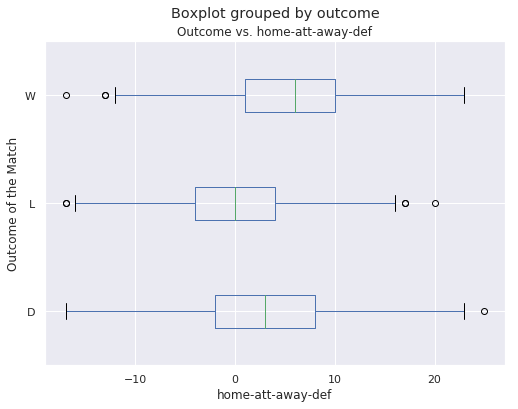

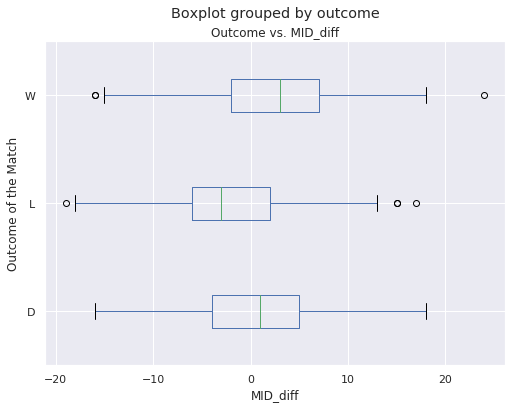

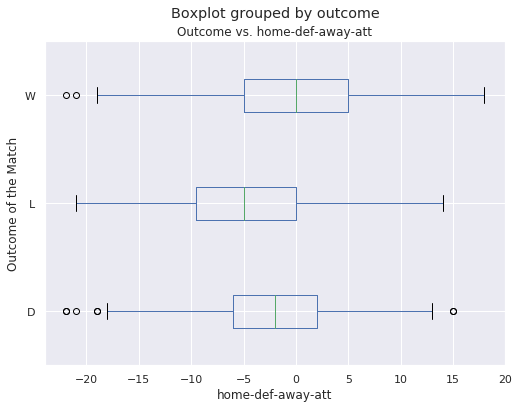

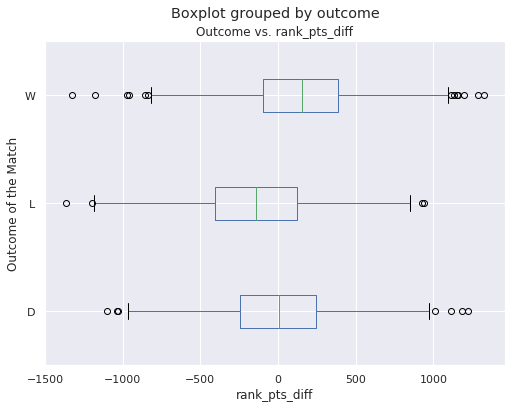

In [53]:
wc_box(train_data, num_cols)

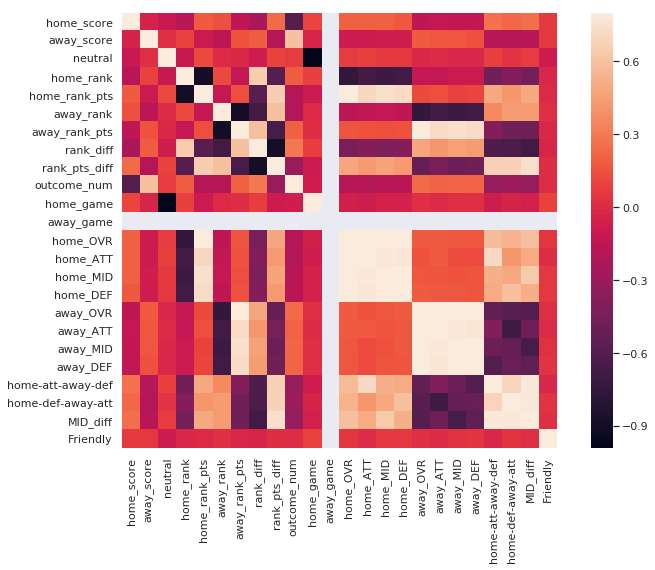

In [54]:
# Setting up the correlation matrix
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

**As expected, we can clearly see that there's a very strong correlation between the ranks and rank points. We can also see that rank and team statistics are strongly correlated so, for example, home_rank and home_OVR are strongly correlated.**

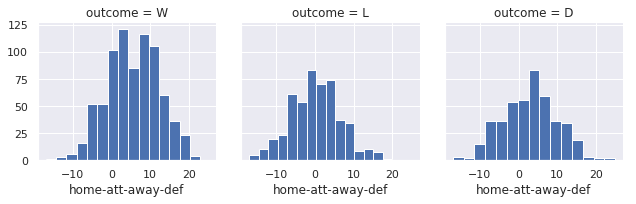

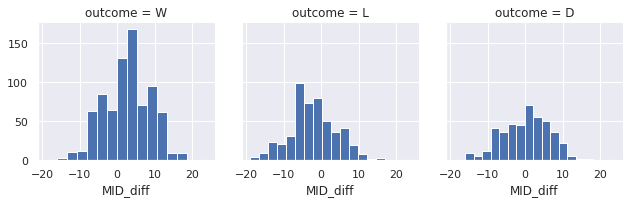

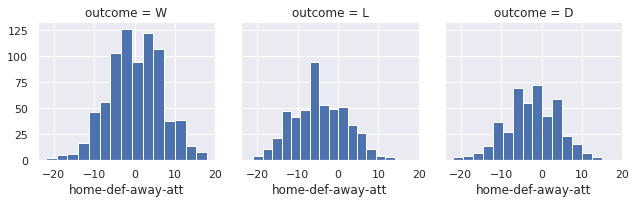

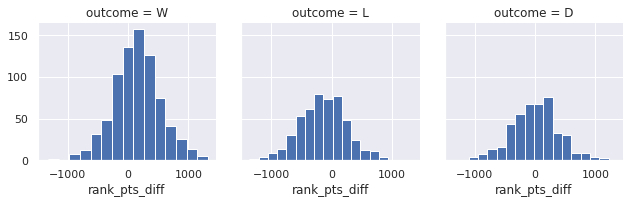

In [55]:
for item in num_cols:
    g = sns.FacetGrid(train_data, col="outcome")
    g = (g.map(plt.hist, item, bins=15))

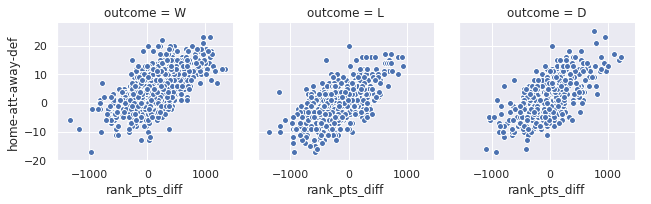

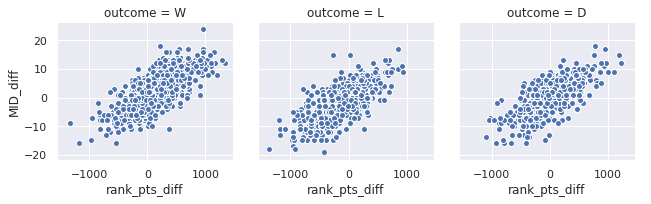

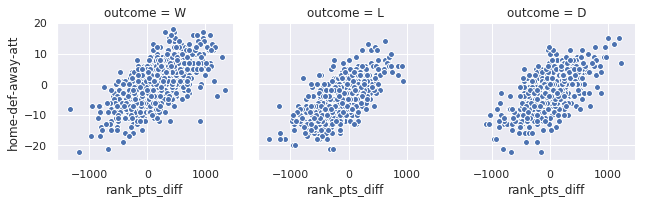

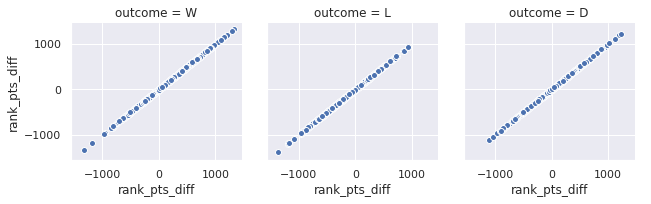

In [56]:
for item in num_cols:
    g = sns.FacetGrid(train_data, col="outcome")
    g = (g.map(plt.scatter, 'rank_pts_diff', item, edgecolor='w').add_legend())

In [57]:
# define the feature set for our base model
predictors = ['rank_pts_diff', 'home-att-away-def', 'MID_diff', 'home-def-away-att']

# scale the features
def scale_df(df, means, stds):
    cols_to_scale = means.index
    df = df.copy()
    df[cols_to_scale] = (df[cols_to_scale] - means) / stds
    return df

cols_to_scale = predictors
train_means = train_data[cols_to_scale].mean(axis=0)
train_stds = train_data[cols_to_scale].std(axis=0)

train_data = scale_df(train_data, train_means, train_stds)
test_data = scale_df(test_data, train_means, train_stds)

# define x_train, y_train and x_test, y_test
x_train, y_train = train_data[predictors], train_data['outcome_num']
x_test, y_test = test_data[predictors], test_data['outcome_num']

display(x_train.describe())
display(x_test.describe())

,rank_pts_diff,home-att-away-def,MID_diff,home-def-away-att
count,1.723000e+03,1.723000e+03,1.723000e+03,1.723000e+03
mean,5.799192e-19,2.664507e-16,-1.101846e-16,-1.331941e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.420253e+00,-2.843903e+00,-3.013165e+00,-2.892215e+00
25%,-6.379688e-01,-7.312684e-01,-7.017095e-01,-7.264475e-01
50%,1.992926e-02,-2.705677e-02,6.877576e-02,-4.525108e-03
75%,6.251465e-01,6.771548e-01,6.851639e-01,7.173972e-01
max,3.188131e+00,3.071474e+00,3.613008e+00,2.883164e+00


,rank_pts_diff,home-att-away-def,MID_diff,home-def-away-att
count,64.000000,64.000000,64.000000,64.000000
mean,0.035473,0.056568,0.078407,0.157907
std,0.990284,0.938854,0.996727,1.056473
min,-2.552856,-1.998849,-2.396777,-1.881523
25%,-0.679011,-0.520005,-0.586137,-0.582063
50%,0.011353,0.113786,0.068776,0.067667
75%,0.760524,0.712365,0.839261,0.897878
max,1.835581,1.944736,2.072037,2.450011


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

# fit logistic regression
simple_logistic_model = LogisticRegressionCV(multi_class = 'ovr', cv=5, penalty='l2')
simple_logistic_model.fit(x_train, y_train)
print('Logistic Regression Train Score: ',simple_logistic_model.score(x_train, y_train))
print('Logistic Regression CV Train Score: ',cross_val_score(simple_logistic_model, x_train, y_train, cv=5).mean())

Logistic Regression Train Score:  0.506094022055
Logistic Regression CV Train Score:  0.506688638188


In [60]:
x_train

,rank_pts_diff,home-att-away-def,MID_diff,home-def-away-att
0,-1.584999,-1.435480,-1.009904,-1.448370
1,0.392371,1.522209,0.222873,-0.004525
2,-0.095234,-0.027057,0.685164,-1.448370
3,0.392371,1.522209,0.222873,-0.004525
4,0.365418,0.395470,0.993358,-0.148910
5,-0.401518,-0.027057,-1.164001,-0.582063
6,-0.803362,-0.027057,-0.547612,-2.025908
7,0.252705,0.254628,-0.547612,-1.592754
8,-0.546084,0.958839,-0.239418,-0.293294
9,-0.073181,-1.012953,0.685164,-0.726447


In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# fit lda and qda 
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
lda.fit(x_train, y_train)
qda.fit(x_train, y_train)

print('LDA Train Score: ',lda.score(x_train, y_train))
print('LDA CV Train Score: ',cross_val_score(lda, x_train, y_train, cv=5).mean())
print('QDA Train Score: ',qda.score(x_train, y_train))
print('QDA CV Train Score: ',cross_val_score(qda, x_train, y_train, cv=5).mean())

LDA Train Score:  0.509576320371
LDA CV Train Score:  0.50320361685
QDA Train Score:  0.508415554266
QDA CV Train Score:  0.504952887987


In [42]:
# choosing lda and qda as they both produced very similar scores on CV data
print('LDA Test Score: ',lda.score(x_test, y_test))
print('QDA Test Score: ',qda.score(x_test, y_test))

LDA Test Score:  0.5625
QDA Test Score:  0.59375


In [43]:
# logistic regression
print('Logistic Regression Test Score: ',simple_logistic_model.score(x_test, y_test))


Logistic Regression Test Score:  0.53125


In [44]:
# confusion matrix for the lda model
pd.crosstab(np.array(y_test), lda.predict(x_test), margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,2,All
Actual,,,
0,23,3,26
1,10,3,13
2,12,13,25
All,45,19,64


In [45]:
# confusion matrix for the qda model
pd.crosstab(np.array(y_test), qda.predict(x_test), margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2,All
Actual,,,,
0,24,0,2,26
1,10,0,3,13
2,10,1,14,25
All,44,1,19,64


In [46]:
# confusion matrix for the logistic regression model
pd.crosstab(np.array(y_test), simple_logistic_model.predict(x_test), margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,2,All
Actual,,,
0,25,1,26
1,11,2,13
2,16,9,25
All,52,12,64
